In [35]:
# STEP 1 — Load Dataset
train_data='https://raw.githubusercontent.com/JiveshCodes/Student-Query-Priority-Classification/refs/heads/main/university_query_train.csv'
test_data='https://raw.githubusercontent.com/JiveshCodes/Student-Query-Priority-Classification/refs/heads/main/university_query_test.csv'

In [11]:
import pandas as pd

In [12]:
train=pd.read_csv(test_data)
test=pd.read_csv(train_data)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Query_ID          1000 non-null   int64 
 1   Student_Query     1000 non-null   object
 2   Department        1000 non-null   object
 3   Days_To_Deadline  1000 non-null   int64 
 4   Priority_Label    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Query_ID          5000 non-null   int64 
 1   Student_Query     5000 non-null   object
 2   Department        5000 non-null   object
 3   Days_To_Deadline  5000 non-null   int64 
 4   Priority_Label    5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [15]:
test.sample()

,Query_ID,Student_Query,Department,Days_To_Deadline,Priority_Label
3848,5469,When will the library issue new ID cards?,Hostel Office,13,Low


In [16]:
train.sample()

,Query_ID,Student_Query,Department,Days_To_Deadline,Priority_Label
157,2767,My exam form is not submitted and tomorrow is ...,Hostel Office,28,High


In [18]:
test.head()

,Query_ID,Student_Query,Department,Days_To_Deadline,Priority_Label
0,1783,How to join student clubs?,Examination Cell,31,Low
1,3918,My admit card has incorrect details.,Examination Cell,48,High
2,222,How to reset my university portal password?,Finance Office,5,Medium
3,2136,My exam form is not submitted and tomorrow is ...,Academic Office,18,High
4,5225,I cannot download my hall ticket for tomorrow'...,Administration,43,High


In [36]:
# STEP 2 — Import Required Libraries

# pandas → used to load and work with dataset (like Excel table)
import pandas as pd

# numpy → used for numerical operations
import numpy as np

# matplotlib → used to create graphs
import matplotlib.pyplot as plt

# seaborn → makes graphs look better
import seaborn as sns

# sklearn → used for preprocessing and evaluation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix

# tensorflow → used to build deep learning model
import tensorflow as tf

# keras tools for text processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# keras layers used to build model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout, Bidirectional

In [ ]:
# # STEP 3 — Read Dataset
# # # Read CSV file into dataframe
# # train = pd.read_csv(train_data)
# # test = pd.read_csv(test_data)

# # # Show basic information
# # train.info()
# already doneeeeeeeeeeeeeeeeeeeeeee
# # test.info()

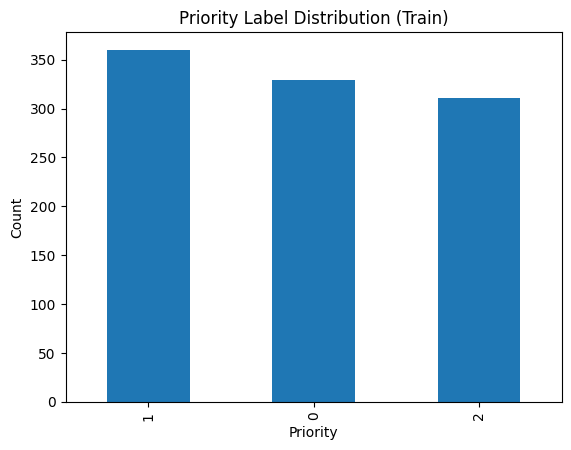

In [37]:
# STEP 4 — Visualize Priority Distribution
# Check how many samples in each priority category

plt.figure()
train['Priority_Label'].value_counts().plot(kind='bar')
plt.title("Priority Label Distribution (Train)")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()

In [38]:
#STEP 5 — Convert Text Labels to Numbers
# Convert Priority_Label (Low, Medium, High) → numbers (0,1,2)

label_encoder = LabelEncoder()

train['Priority_Label'] = label_encoder.fit_transform(train['Priority_Label'])
test['Priority_Label'] = label_encoder.transform(test['Priority_Label'])

In [39]:
# STEP 6 — Convert Department to Numbers
# Convert Department names into numbers

dept_encoder = LabelEncoder()

train['Department'] = dept_encoder.fit_transform(train['Department'])
test['Department'] = dept_encoder.transform(test['Department'])

In [40]:
# STEP 7 — Scale Numerical Column
# Scale Days_To_Deadline between 0 and 1

scaler = MinMaxScaler()

train['Days_To_Deadline'] = scaler.fit_transform(train[['Days_To_Deadline']])
test['Days_To_Deadline'] = scaler.transform(test[['Days_To_Deadline']])

📝 STEP 8 — Convert Text to Numbers (Tokenization)
👉 Why?

Model cannot read sentences directly.

Tokenizer:

Breaks sentence into words

Converts words into numbers

In [27]:
# Maximum words we allow in vocabulary
max_words = 10000

# Maximum sentence length
max_len = 50

# Create tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# Learn vocabulary from training text
tokenizer.fit_on_texts(train['Student_Query'])

# Convert sentences into number sequences
X_text_train = tokenizer.texts_to_sequences(train['Student_Query'])
X_text_test = tokenizer.texts_to_sequences(test['Student_Query'])

# Make all sequences same length
X_text_train = pad_sequences(X_text_train, maxlen=max_len)
X_text_test = pad_sequences(X_text_test, maxlen=max_len)

In [41]:
# 🏗 STEP 9 — Prepare Structured Features

# These are additional numerical inputs
# Department + Days_To_Deadline

X_struct_train = train[['Department', 'Days_To_Deadline']].values
X_struct_test = test[['Department', 'Days_To_Deadline']].values

# Target variable
y_train = train['Priority_Label'].values
y_test = test['Priority_Label'].values

🧠 STEP 10 — Build Improved LSTM Model
Model Structure:

Embedding Layer → converts word numbers into vectors

Bidirectional LSTM → understands sentence context

Dense Layer → structured data learning

Concatenate → combine both

Softmax → final prediction

In [29]:
# Text input layer
text_input = Input(shape=(max_len,))

# Embedding converts word IDs into dense vectors
embedding = Embedding(input_dim=max_words, output_dim=128)(text_input)

# Bidirectional LSTM reads sentence forward and backward
lstm_out = Bidirectional(LSTM(64))(embedding)

# Structured input layer
structured_input = Input(shape=(2,))

# Small dense layer for structured data
dense_struct = Dense(32, activation='relu')(structured_input)

# Combine both outputs
combined = Concatenate()([lstm_out, dense_struct])

# Fully connected layer
dense1 = Dense(64, activation='relu')(combined)

# Dropout prevents overfitting
dropout = Dropout(0.4)(dense1)

# Final output layer
output = Dense(len(np.unique(y_train)), activation='softmax')(dropout)

# Create model
model = Model(inputs=[text_input, structured_input], outputs=output)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  1,280,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │     98,816 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │         96 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 160)       │          0 │ bidirectional[0]… │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │     10,304 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │        195 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,389,411 (5.30 MB)

 Trainable params: 1,389,411 (5.30 MB)

 Non-trainable params: 0 (0.00 B)

# 🚀 STEP 11 — Train Model

In [30]:
history = model.fit(
    [X_text_train, X_struct_train],
    y_train,
    epochs=12,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.4627 - loss: 1.0541 - val_accuracy: 0.9800 - val_loss: 0.5119
Epoch 2/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9484 - loss: 0.3312 - val_accuracy: 1.0000 - val_loss: 0.0245
Epoch 3/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 1.0000 - loss: 0.0323 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 9.2606e-04
Epoch 5/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 4.4101e-04
Epoch 6/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 2.5887e-04
Epoch 7/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 1.8386e-04
Epoch 8/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 1.0000 - loss: 0.0019 - val_ac

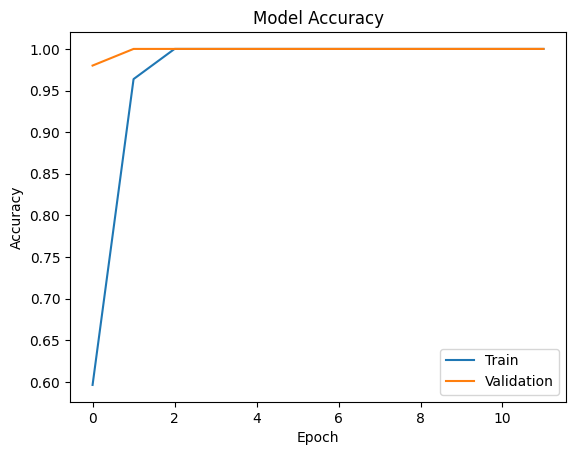

In [31]:
#STEP 12 — Accuracy Graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

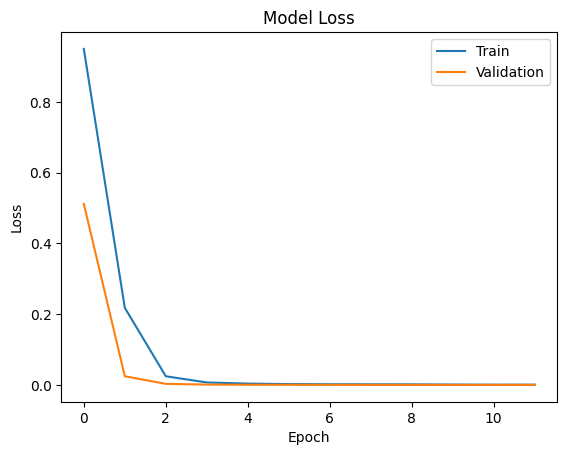

In [32]:
#STEP 13 — Loss Graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [33]:
# STEP 14 — Evaluate on Test Data
loss, acc = model.evaluate([X_text_test, X_struct_test], y_test)

print("Test Accuracy:", acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 1.0000 - loss: 3.7143e-05
Test Accuracy: 1.0


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step


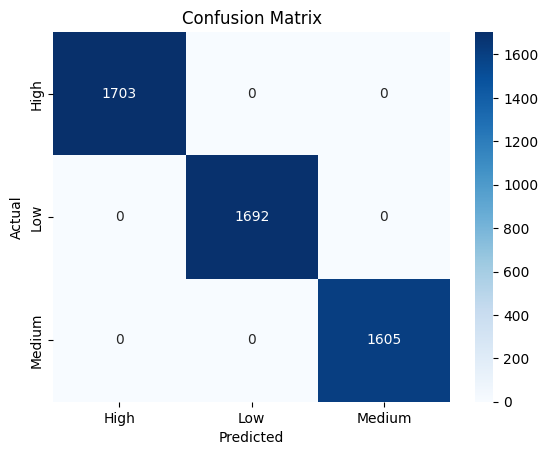

In [34]:
# 📊 STEP 15 — Confusion Matrix
# Get predictions
y_pred = model.predict([X_text_test, X_struct_test])

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()